## Prueba de Conocimientos Ciencia de Datos 01

En este notebook puedes utilizar todas las librerias con las que hemos trabajado.

### Ejercicio 1:

_**url** = https://www.20minutos.es/_

Vamos a hacer Web Scraping de las primeras 3 paginas de las categorias de noticias: **Ciencia**, **Deporte**, **Gente**, **Economía**, **Madrid** y **Opinión**.

Y de cada noticia/articulo vamos a obtener:

- **Titulo**
- **Hora**
- **Fecha**
- **Autor**
- **Texto completo**
- **Categoria (columna objetivo)**

**Sustituir con NaN's en el caso de que no se pueda extraer alguno de esos datos anteriores.**

Genera un DataFrame con esta información y guardalo en el archivo **`20minutos_1.csv`**.

In [54]:
import requests 

from bs4 import BeautifulSoup

from selenium import webdriver

from time import sleep

import helium

import pandas as pd
import numpy as np

from nltk.corpus import stopwords
# nltk.download('stopwords')

from wordcloud import WordCloud
from PIL import Image

import matplotlib.pyplot as plt

In [2]:
def noticiasCategoria(url_base, categoria, num_paginas):
    lista_urls = []

    #Recorremos las páginas
    for i in range(1, num_paginas + 1):
        
        #Elaboramos la página a la que hay que acceder
        url = f"{url_base}{categoria}/{i}/"
        #print(url)
        
        response = requests.get(url)
        
        soup = BeautifulSoup(response.text, "html.parser")
                
        #Recorremos el html para extraer las noticias
        for bs in soup.find_all("div", class_ = "media-content"):

            #Accedemos al enlace del atributo "href" de la etiqueta "a"
            enlace = bs.find("a")["href"]
            sleep(3)

            #Sólo incluimos en la lista si el enlace incluye "noticia"
            if (("noticia" in enlace) or (categoria in enlace)) and ("/imagenes/" not in enlace):
                lista_urls.append(enlace)
            
    return lista_urls

In [3]:
def info_noticia(url, categoria):

    response = requests.get(url)
    soup_noticia = BeautifulSoup(response.text, "html.parser")
    sleep(5)

    # Titulo
    try:
        titulo = soup_noticia.find("h1", class_ = "article-title").text.strip()
    except:
        titulo = np.nan
        
    # Hora y fecha
    try:
        article_date = soup_noticia.find("span", class_ = "article-date").find("a").text.split(" - ")
        hora = article_date[1]
        fecha = article_date[0]
    except:
        hora = np.nan
        fecha = np.nan
        
    # Autor
    try:
        autor = soup_noticia.find("span", class_ = "article-author").text
    except:
        autor = np.nan
        
    # Texto
    try:
        parrafos = list()

        for parrafo in soup_noticia.find("div", class_ = "article-text").find_all("p", class_ = "paragraph"):
            parrafos.append(parrafo.text.strip())

        texto = "\n".join(parrafos)

    except:
        texto = np.nan
        
    return {"Título" : titulo, "Hora" : hora, "Fecha" : fecha, "Autor" : autor, "Texto Completo" : texto, "Categoría" : categoria}

In [4]:
def genera_fichero(url_base, lista_categorias, num_paginas, nombre_fichero):

    lista_noticias = list()
    
    # Se recorre la lista de categorías
    for categoria in lista_categorias:
        print(f"Categoría: {categoria}")
        
        # Para extraer las urls de las noticias de cada categoría
        lista_urls = noticiasCategoria(url_base, categoria, num_paginas)
        print("Número de noticias: ", len(lista_urls))

        for url in lista_urls:
            # Y extraer la información de cada noticia a partir de su url
            lista_noticias.append(info_noticia(url, categoria))
    
    # Se crea el DataFrame que almacenará la información de las noticias
    df = pd.DataFrame(lista_noticias, columns = ["Título", "Hora", "Fecha", "Autor", "Texto Completo", "Categoría"])
        
    # Se vuelca el contenido del DataFrame al fichero csv nombre_fichero
    df.to_csv(nombre_fichero, index = False)
    
    return df

In [5]:
%%time
url_base = "https://www.20minutos.es/"
lista_categorias = ["ciencia", "deportes", "gente", "economia", "madrid", "opinion"]
num_paginas = 1 #3
nombre_fichero = "20minutos_1.csv"

df = genera_fichero(url_base, lista_categorias, num_paginas, nombre_fichero)
df.head()

Categoría: ciencia
Número de noticias:  34
Categoría: deportes
Número de noticias:  46
Categoría: gente
Número de noticias:  34
Categoría: economia
Número de noticias:  35
Categoría: madrid
Número de noticias:  42
Categoría: opinion
Número de noticias:  35
CPU times: user 20.1 s, sys: 149 ms, total: 20.2 s
Wall time: 31min 58s


,Título,Hora,Fecha,Autor,Texto Completo,Categoría
0,Qué es el extraño anillo que han descubierto a...,14:24h,07.04.2022,\n20minutos\n,Los científicos han descubierto un anillo inte...,ciencia
1,Un investigador promueve un modelo matemático ...,13:55h,07.04.2022,EUROPA PRESS,El investigador del Centro de Investigaciones ...,ciencia
2,HD1: la galaxia más lejana y más antigua a 100...,12:17h,07.04.2022,\n20minutos\n,Un equipo internacional de astrónomos ha descu...,ciencia
3,El dinosaurio cojo que dejó sus huellas en la ...,03:22h,07.04.2022,EFE,Hace 129 millones de años caminaba por la serr...,ciencia
4,"""Ya hemos logrado que el tacto se sienta a dis...",12:55h,05.04.2022,\nAraceli Guede\n \nJorge París\n \nBieito Álv...,"La última vez que hablamos con Isaac Castro, e...",ciencia


- Escribe el código para sacar la información de las primeras 5 páginas de todas las categorias:
    - **Andalucia**, **Valencia**, **Animaleros**, **Cataluña**, **Nacional**, **Vivienda**, **Internacional**, **Cultura**, **Empleo**, **Ciencia**, **Deporte**, **Gente**, **Economía**, **Madrid** y **Opinión**.

. Guarda esta información en el archivo **`20minutos_2.csv`**.

In [6]:
# Ejecutado para una sola página por el tiempo requerido

In [11]:
%%time
url_base = "https://www.20minutos.es/"
lista_categorias = ["andalucia", "comunidad-valenciana", "animaleros", "cataluna", "nacional", "vivienda", "internacional", "cultura", "empleo", "ciencia", "deportes", "gente", "economia", "madrid", "opinion"]
num_paginas = 1#5
nombre_fichero = "20minutos_2.csv"

df_2 = genera_fichero(url_base, lista_categorias, num_paginas, nombre_fichero)
df_2.head()

Categoría: andalucia
Número de noticias:  42
Categoría: comunidad-valenciana
Número de noticias:  42
Categoría: animaleros
Número de noticias:  40
Categoría: cataluna
Número de noticias:  63
Categoría: nacional
Número de noticias:  38
Categoría: vivienda
Número de noticias:  29
Categoría: internacional
Número de noticias:  37
Categoría: cultura
Número de noticias:  34
Categoría: empleo
Número de noticias:  35
Categoría: ciencia
Número de noticias:  34
Categoría: deportes
Número de noticias:  46
Categoría: gente
Número de noticias:  34
Categoría: economia
Número de noticias:  35
Categoría: madrid
Número de noticias:  42
Categoría: opinion
Número de noticias:  35
CPU times: user 52.8 s, sys: 576 ms, total: 53.4 s
Wall time: 1h 25min 26s


,Título,Hora,Fecha,Autor,Texto Completo,Categoría
0,El Ayuntamiento de Sevilla implantará un milla...,17:10h,07.04.2022,\nBeatriz Rodriguez\n,"El Ayuntamiento de Sevilla, a través de la Age...",andalucia
1,¿Cuáles son las fechas de junio más probables ...,13:02h,07.04.2022,\nGonzalo Núñez\n,Desde principios de año el runrún parlamentari...,andalucia
2,"Andalucía ""compensará"" a las empresas que trab...",13:48h,07.04.2022,\nGonzalo Núñez\n,La situación económica ha protagonizado la ses...,andalucia
3,El SAS derivó a la sanidad privada a más de 85...,13:55h,07.04.2022,\nEP\n,"El consejero de Salud y Familias, Jesús Aguirr...",andalucia
4,Qué desgrava en la Declaración de la Renta 202...,12:57h,06.04.2022,\n20minutos\n,Este miércoles 6 de abril arranca la campaña d...,andalucia


- **Escribe el código para sacar la información de todas las categorias del ejercicio anterior pero solo del mes de marzo. Guarda esta información en el archivo `20minutos_3.csv`.**

In [9]:
# A partir del DataFrame del ejercicio anterior (df_2)

In [38]:
df_3 = pd.DataFrame(columns = ["Título", "Hora", "Fecha", "Autor", "Texto Completo", "Categoría"])

# Recorremos todas las filas del DataFrame df_2
for i in df_2.index:
    
    # Si la fecha está informada y termina en .03.2022 (marzo)
    if (type(df_2["Fecha"][i]) != float) and (df_2["Fecha"][i][2:] == ".03.2022"):
        # Añadimos la información de la noticia al DataFrame df_3
        df_3 = df_3.append({"Título" : df_2.iloc[i][0], "Hora" : df_2.iloc[i][1], "Fecha" : df_2.iloc[i][2],
                            "Autor" : df_2.iloc[i][3], "Texto Completo" : df_2.iloc[i][4],
                            "Categoría" : df_2.iloc[i][5]}, ignore_index = True)

df_3.head()

,Título,Hora,Fecha,Autor,Texto Completo,Categoría
0,Los caseteros anuncian paros en la Feria de Abril,20:14h,31.03.2022,\nDaniel Ríos\n \nBeatriz Rodriguez\n,"""O cambia la norma o cambia la Feria"". Es el l...",andalucia
1,La Policía evita que un joven se arroje al vac...,19:32h,31.03.2022,\n20minutos\n,La Policía Nacional ha evitado que un joven de...,andalucia
2,Al menos un muerto y tres heridos graves tras ...,18:05h,31.03.2022,AGENCIAS,Al menos tres personas resultaron heridas de g...,andalucia
3,La Junta abre el plazo para solicitar algunas ...,17:44h,31.03.2022,\n20minutos\n,La Junta sigue apostando por la educación de p...,andalucia
4,Qué tiempo hará en Córdoba en Semana Santa 2022,16:13h,31.03.2022,\n20minutos\n,La meteorología es uno de los factores que más...,andalucia


In [39]:
# Pasamos el DataFrame a fichero csv
df_3.to_csv("20minutos_3.csv", index = False)

- **Elige el articulo que más te interese de todos los articulos extraidos, muestra en un WordCloud las palabras más repetidas eliminando los stopwords.**

In [ ]:
# Noticia de Ciencia del primer apartado
# Titular: "Así es Eärendel, la estrella más lejana jamás observada: desaparecida ya y con nombre de un medioelfo de Tolkien"

In [55]:
# Palabras a excluir del WordCloud
stopwords = set(stopwords.words('spanish', 'english'))
stopwords

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [56]:
# Otras palabras que no están en el conjunto "stopwords" de nltk pero que aparecen en el artículo
# y carecen de información
stopwords.add("según")
stopwords.add("bien")
stopwords.add("cuánto")
stopwords.add("cómo")
stopwords.add("aquel")
stopwords.add("aquella")
stopwords.add("aquello")
stopwords.add("aquellos")
stopwords.add("aquellas")
stopwords.add("algún")
stopwords.add("alguna")
stopwords.add("unas")
stopwords.add("cualquier")
stopwords.add("cualquiera")
stopwords.add("cuyo")
stopwords.add("cuya")
stopwords.add("cuyos")
stopwords.add("cuyas")
stopwords.add("si")
stopwords.add("R")
stopwords.add("aún")
stopwords.add("así")
stopwords.add("Gracias")
stopwords.add("hace")
stopwords.add("hacia")
stopwords.add("tras")
stopwords.add("aunque")
stopwords.add("The")
stopwords.add("of")
stopwords.add("the")

In [ ]:
# A partir del DataFrame de la primera parte del ejercicio

In [57]:
indice = df[df["Título"] == "Así es Eärendel, la estrella más lejana jamás observada: desaparecida ya y con nombre de un medioelfo de Tolkien"].index
indice[0]

12

In [58]:
texto_articulo = df.at[indice[0], "Texto Completo"]
len(texto_articulo)

5940

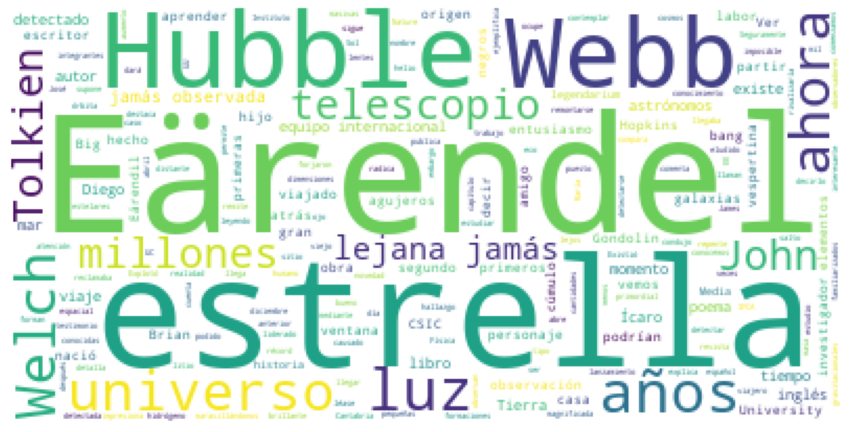

In [59]:
estrella = WordCloud(background_color = "white",
                     max_words = len(texto_articulo),
                     stopwords = stopwords)

estrella.generate(texto_articulo)

plt.subplots(figsize = (15, 15))
plt.imshow(estrella)
plt.axis("off")
plt.show()

In [ ]:
# A partir del fichero "20minutos_1.csv"

In [60]:
df_wordcloud = pd.read_csv("20minutos_1.csv")
df_wordcloud.head()

,Título,Hora,Fecha,Autor,Texto Completo,Categoría
0,Qué es el extraño anillo que han descubierto a...,14:24h,07.04.2022,\n20minutos\n,Los científicos han descubierto un anillo inte...,ciencia
1,Un investigador promueve un modelo matemático ...,13:55h,07.04.2022,EUROPA PRESS,El investigador del Centro de Investigaciones ...,ciencia
2,HD1: la galaxia más lejana y más antigua a 100...,12:17h,07.04.2022,\n20minutos\n,Un equipo internacional de astrónomos ha descu...,ciencia
3,El dinosaurio cojo que dejó sus huellas en la ...,03:22h,07.04.2022,EFE,Hace 129 millones de años caminaba por la serr...,ciencia
4,"""Ya hemos logrado que el tacto se sienta a dis...",12:55h,05.04.2022,\nAraceli Guede\n \nJorge París\n \nBieito Álv...,"La última vez que hablamos con Isaac Castro, e...",ciencia


In [61]:
df_wordcloud[df_wordcloud["Título"] == "Así es Eärendel, la estrella más lejana jamás observada: desaparecida ya y con nombre de un medioelfo de Tolkien"]

,Título,Hora,Fecha,Autor,Texto Completo,Categoría
12,"Así es Eärendel, la estrella más lejana jamás ...",12:19h,02.04.2022,CHEMA LIZARRALDE,Aún nos llegaba el eco del entusiasmo causado ...,ciencia


In [62]:
fila = df_wordcloud[df_wordcloud["Título"] == "Así es Eärendel, la estrella más lejana jamás observada: desaparecida ya y con nombre de un medioelfo de Tolkien"].index
texto = df_wordcloud.at[fila[0], "Texto Completo"]
len(texto)

5940

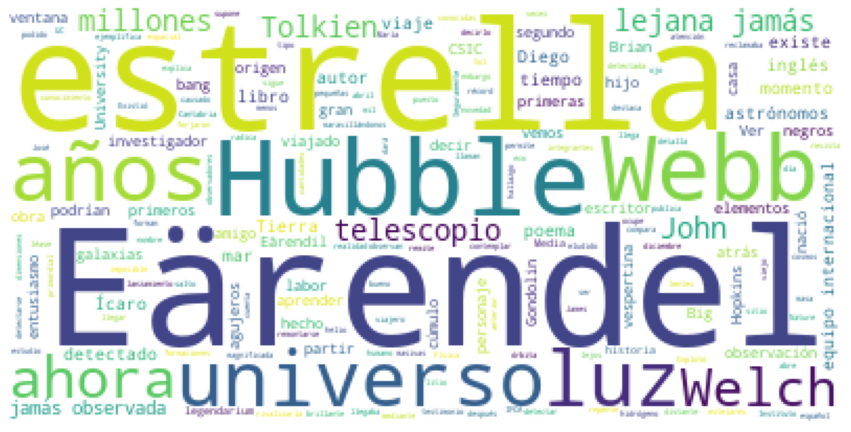

In [63]:
estrella1 = WordCloud(background_color = "white",
                     max_words = len(texto),
                     stopwords = stopwords)

estrella1.generate(texto)

plt.subplots(figsize = (15, 15))
plt.imshow(estrella1)
plt.axis("off")
plt.show()

- Define una función que eliga al azar **`n`** artículos al azar del fichero **`20minutos_1.csv`** y que muestre para cada articulo:
    - **Titulo, fecha y el WordCloud.**
    
Prueba la función con **`n = 5`**

In [49]:
def articulos_azar(n, fichero, stopwords):

    # Leemos el fichero pasado por parámetro
    df_articulos = pd.read_csv(fichero)
    
    # El número de filas definirá el límite de los números aleatorios para elegir n artículos
    n_filas = df_articulos.shape[0]
    
    # Lista de identificadores aleatorios de artículos
    ids = np.random.randint(n_filas, size=n)
    
    # Recorremos la lista de identificadores de artículos
    for i in ids:
        # Nos quedamos con el texto completo para mostrar el WordCloud
        texto = df_articulos.at[i, "Texto Completo"]
        # Mostramos la información del artículo
        print(f"Artículo con índice {i}")        
        print(f"Título: {df_articulos.at[i, 'Título']}")
        print(f"Fecha: {df_articulos.at[i, 'Fecha']}")
        print("WordCloud:\n")
        wordcloud = WordCloud(background_color = "white",
                              max_words = len(texto),
                              stopwords = stopwords)

        wordcloud.generate(texto)

        plt.subplots(figsize = (15, 15))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        print("#"*100)

Artículo con índice 55
Título: Ancelotti da negativo y llegará a tiempo para dirigir al Real Madrid ante el Chelsea
Fecha: 06.04.2022
WordCloud:



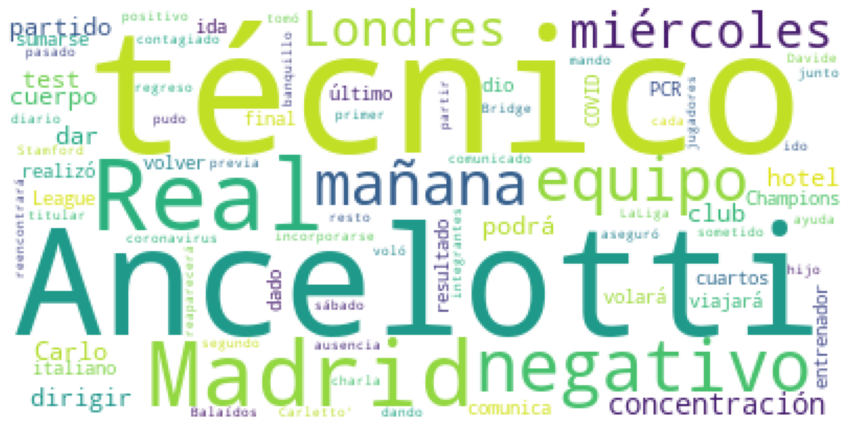

####################################################################################################
Artículo con índice 19
Título: Chatelperroniense, última resistencia neandertal a la expansión Homo sapiens
Fecha: 30.03.2022
WordCloud:



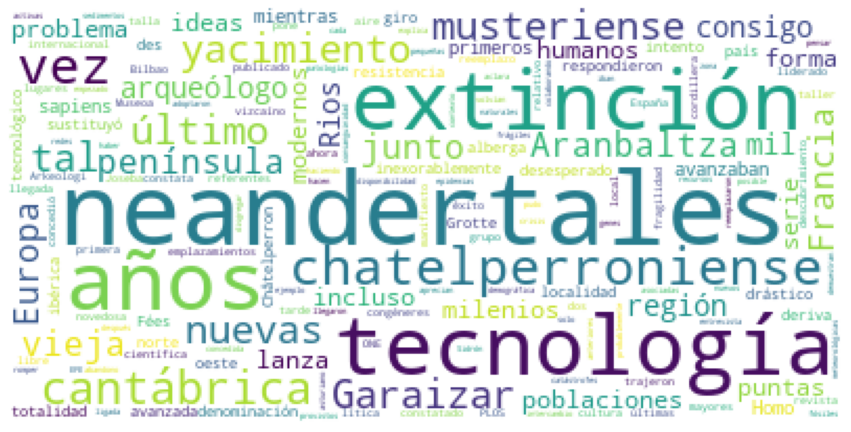

####################################################################################################
Artículo con índice 113
Título: Mercedes Milá recibe su felicitación más inesperada por su 71 cumpleaños
Fecha: 06.04.2022
WordCloud:



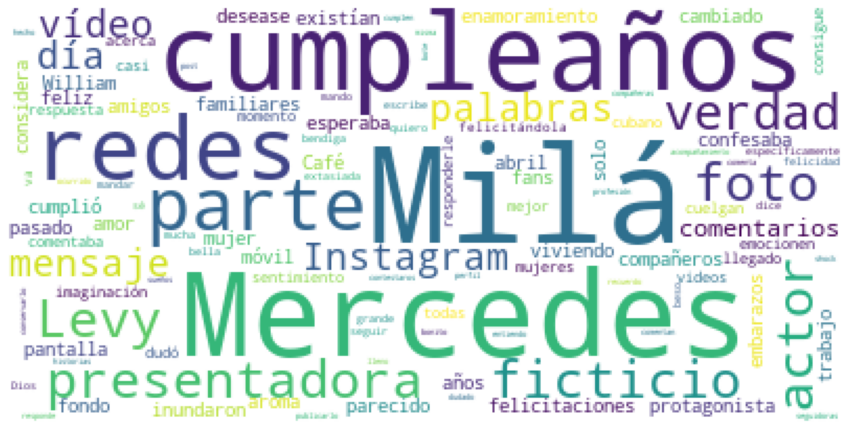

####################################################################################################
Artículo con índice 152
Título: Cuando Putin condenaba la violencia y el terror en su viaje a Madrid de 2006
Fecha: 07.04.2022
WordCloud:



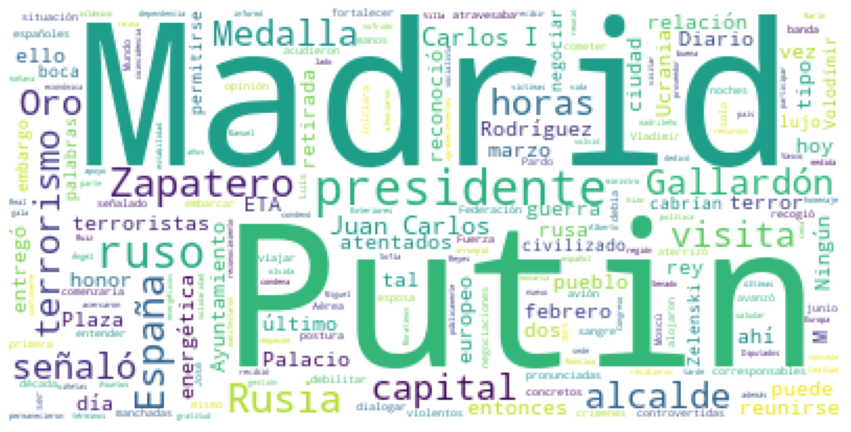

####################################################################################################
Artículo con índice 10
Título: El motivo por el que las pizarras son verdes
Fecha: 02.04.2022
WordCloud:



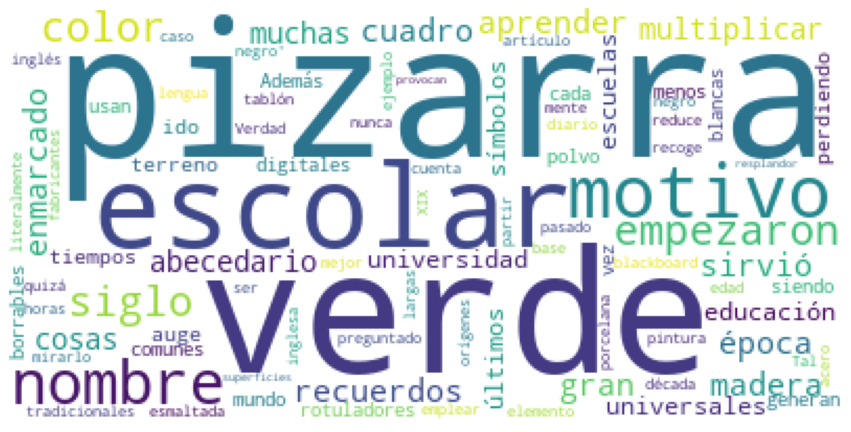

####################################################################################################


In [64]:
# Aprovechamos las stopwords del apartado anterior
articulos_azar(5, "20minutos_1.csv", stopwords)